In [2]:
# IMport libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('all_month.csv')

In [4]:
# Making all values in the magnitude column to positive integers and converting NaN values to 0

mag_column = 'mag'
df[mag_column] = df[mag_column].abs().fillna(0)

# Find min and max values of mag to define threshold
min_value = df[mag_column].min()
print("Minimum value in 'mag' column is: ", min_value)

max_value = df[mag_column].max()
print("Maximum value in 'mag' column is: ", max_value)

Minimum value in 'mag' column is:  0.0
Maximum value in 'mag' column is:  7.6


In [5]:
# Plot scatter plot of latitude/longitude of all earthquakes with magnitude as scale for colour intensity

# Use the 'scatter_geo' function as a baseline map to plot values ontop of

fig = px.scatter_geo(
    df,lat='latitude',
    lon='longitude', 
    hover_name="place",  
    size='mag',
    size_max=7,)
fig.update_layout(title = 'World map', title_x=0.5)
fig.update_layout(title = 'Earthquake World Map', title_x=0.52, title_y=0.8, width=1000, height=800)
fig.show()

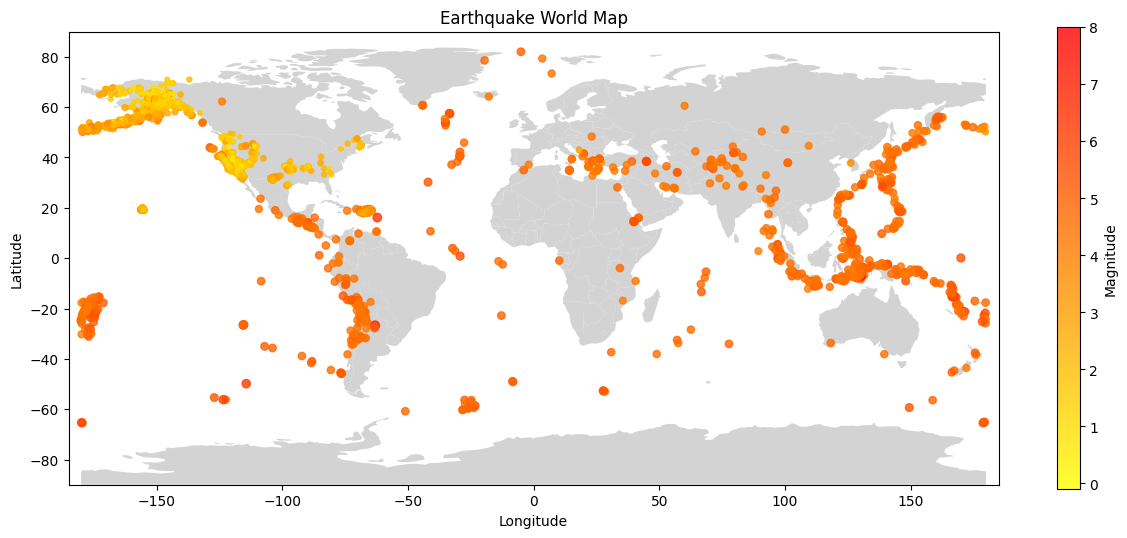

In [6]:
# Plotting world map
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(15, 6))
worldmap.plot(color="lightgrey", ax=ax)

# magnitude upper limit
threshold = 8


# Plotting our Mag data with a color map

x = df['longitude']
y = df['latitude']
z = df['mag']

# Creating axis limits and title
plt.xlim([-185, 185])
plt.ylim([-90, 90])

plt.scatter(x, y, s=30*z/5, c=z, alpha=0.8, vmin=threshold, vmax=0,
            cmap='autumn_r')
plt.colorbar(label='Magnitude')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake World Map")
plt.show()


['ml' 'md' 'mww' 'mb' 'mwr' 'mw' 'mwc' 'mh' 'mb_lg' nan]


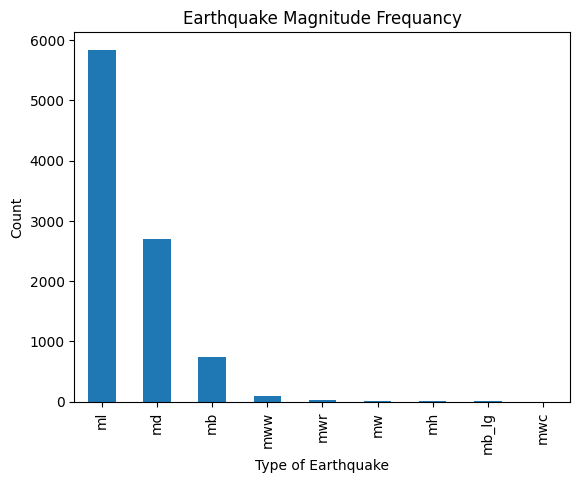

In [7]:
# List distinct values within the 'magType' column to find type of earthquakes

magType_column = 'magType'
distinct_values = df[magType_column].unique()
print(distinct_values)

# Plot bar chart to count number of appearances for each type of earthquake

df[magType_column].value_counts().plot(kind='bar')
plt.xlabel('Type of Earthquake')
plt.ylabel('Count')
plt.title('Earthquake Magnitude Frequancy')
plt.show()

# Data not clearly presented.

C:\Users\ibmmo\AppData\Local\Temp\ipykernel_26356\1789213154.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 0, 'latitude'),
 Text(1.5, 0, 'longitude'),
 Text(2.5, 0, 'depth'),
 Text(3.5, 0, 'mag'),
 Text(4.5, 0, 'nst'),
 Text(5.5, 0, 'gap'),
 Text(6.5, 0, 'dmin'),
 Text(7.5, 0, 'rms'),
 Text(8.5, 0, 'horizontalError'),
 Text(9.5, 0, 'depthError'),
 Text(10.5, 0, 'magError'),
 Text(11.5, 0, 'magNst')]

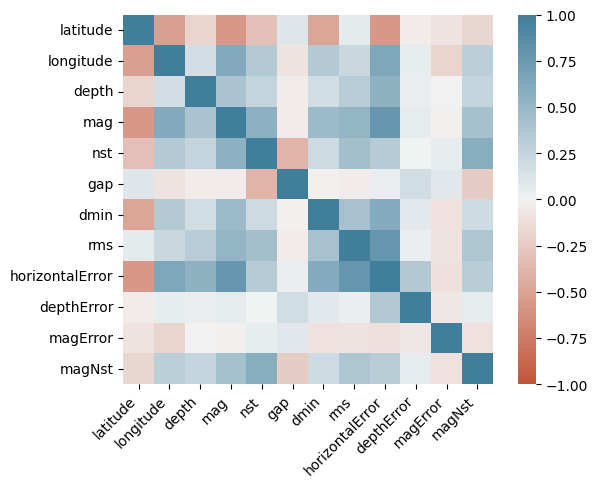

In [9]:
#Create correlation matrix 

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 230, n=500),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

Text(0.5, 1.0, 'Correlation between Magnitude and Depth')

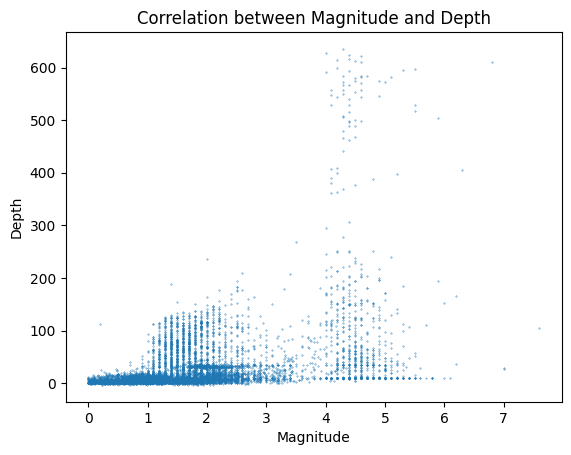

In [10]:
# Correlation between Magnitude and Depth

df.plot(x='mag', y='depth', style='o', markersize= 0.30,legend=False)
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title("Correlation between Magnitude and Depth")


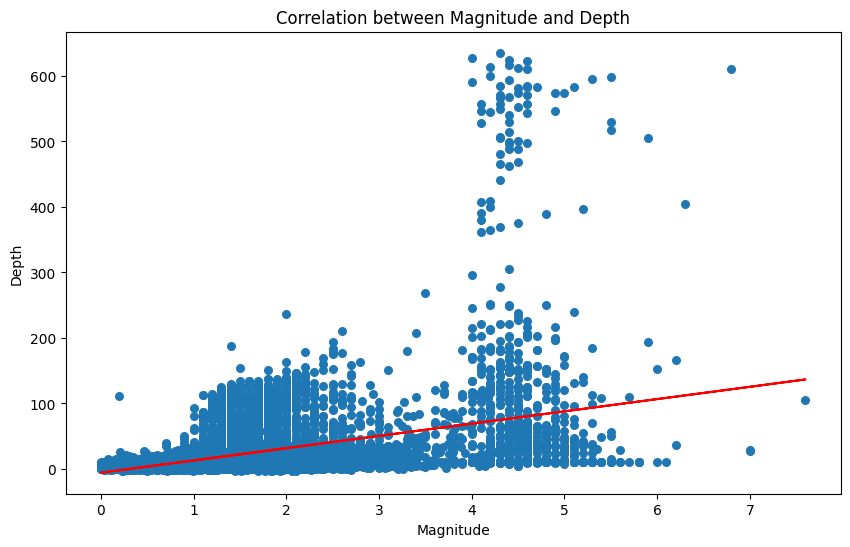

In [11]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points
ax.scatter(df['mag'], df['depth'], s=30)

# Fit a linear regression model to the data
x = df['mag'].values.reshape(-1, 1)
y = df['depth'].values
model = LinearRegression().fit(x, y)

# Plot the line of best fit
ax.plot(x, model.predict(x), color='red')

# Add axis labels and a title
ax.set_xlabel('Magnitude')
ax.set_ylabel('Depth')
ax.set_title('Correlation between Magnitude and Depth')

# Show the plot
plt.show()


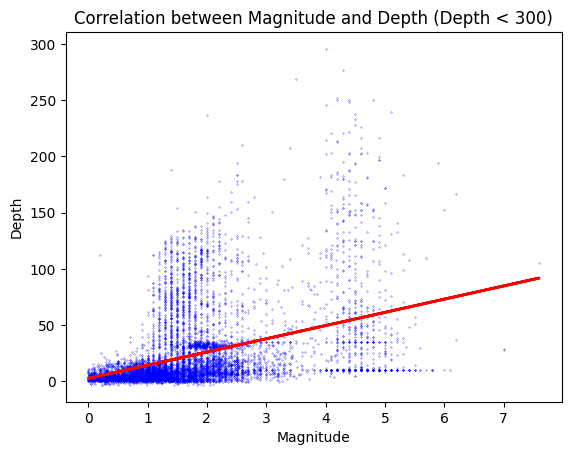

In [12]:
# Create a new DataFrame with only the data points with depth less than 300
df_subset = df[df['depth'] < 300]

# Define the input and output variables for the linear regression model
X = df_subset[['mag']]
y = df_subset['depth']

# Create and fit the linear regression model
reg = LinearRegression().fit(X, y)

# Plot the data points and the line of best fit
plt.scatter(X, y, s=0.05, color='blue')
plt.plot(X, reg.predict(X), color='red', linewidth=2)
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title('Correlation between Magnitude and Depth (Depth < 300)')
plt.show()





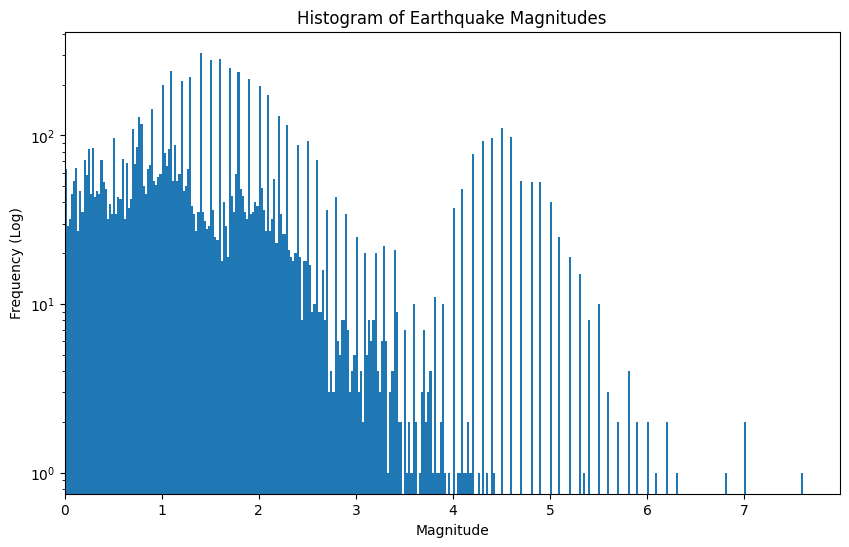

In [13]:
# Histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['mag'], bins=350)
ax.set_xlim(xmin=0, xmax=None)
ax.set_xlabel('Magnitude')
ax.set_ylabel('Frequency (Log)')
ax.set_yscale('log')
ax.set_title('Histogram of Earthquake Magnitudes')
plt.show()


C:\Users\ibmmo\AppData\Local\Temp\ipykernel_26356\1330621630.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




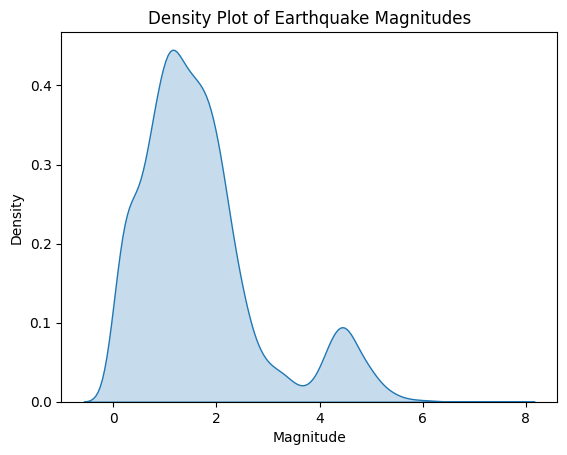

In [14]:
# Develop desnity plot of earthquake magnitude

sns.kdeplot(df['mag'], shade=True)
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('Density Plot of Earthquake Magnitudes')
plt.show()

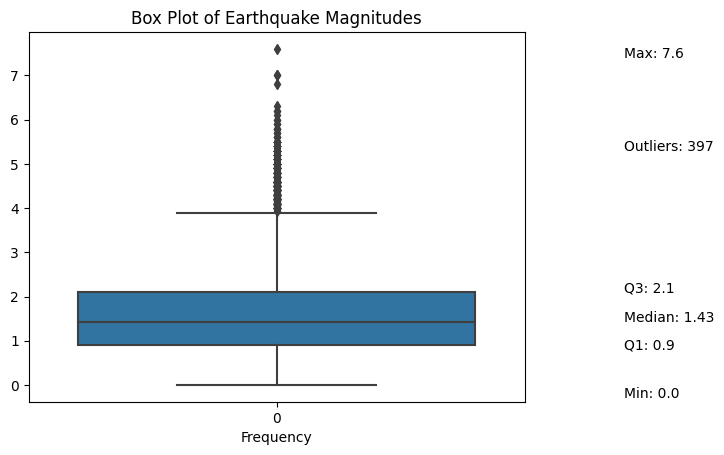

In [15]:
# Develop boxplot of earthquake magnitude


sns.boxplot(df['mag'])
plt.xlabel('Frequency')
plt.title('Box Plot of Earthquake Magnitudes')
plt.text(x = 0.7, y = df['mag'].min()-0.3, s = "Min: " + str(df['mag'].min()), fontsize = 10)
plt.text(x = 0.7, y = df['mag'].quantile(0.25)-0.1, s = "Q1: " + str(df['mag'].quantile(0.25)), fontsize = 10)
plt.text(x = 0.7, y = df['mag'].quantile(0.50), s = "Median: " + str(df['mag'].quantile(0.50)), fontsize = 10)
plt.text(x = 0.7, y = df['mag'].quantile(0.75), s = "Q3: " + str(df['mag'].quantile(0.75)), fontsize = 10)
plt.text(x = 0.7, y = df['mag'].max()-0.2, s = "Max: " + str(df['mag'].max()), fontsize = 10)
plt.text(x = 0.7, y = df['mag'].quantile(0.95)+0.8, s = "Outliers: " + str(df[df['mag'] > df['mag'].quantile(0.95)].shape[0]), fontsize = 10)
plt.show()

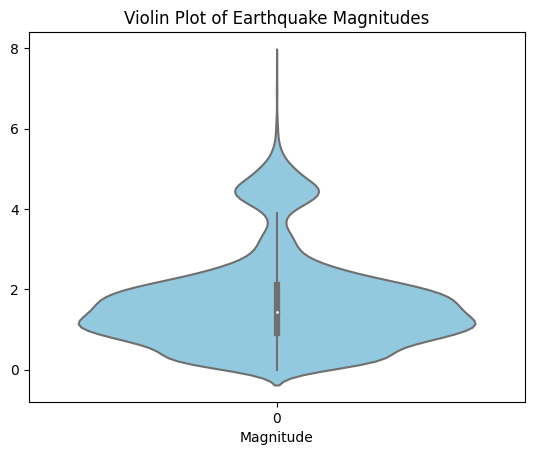

In [16]:
# Develop violon plot of earthquake magnitude


sns.violinplot(df['mag'], color = 'skyblue')
plt.xlabel('Magnitude')
plt.title('Violin Plot of Earthquake Magnitudes')
plt.show()
